We conlcude from the models' results that our Random Forest model is the slightly better at predicting bugs.

We aim in this notebook at understanding how the most important features influence the presence of bugs.

# Setup

In [1]:
# imports
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# constants
INPUT_DIR = "../../data/input/"
OUTPUT_DIR = "../../data/output/"

In [28]:
# Utility functions

def load_model(filename):
  """Load model with name."""
  return joblib.load(OUTPUT_DIR + f'/models/{filename}.pkl')


def plot_feature_importances(model, name, lr=False, features=None):
  """Show model features importance."""
  feature_importances = pd.DataFrame(columns = ['features', 'weight'])
  feature_importances['features'] = model.feature_names_in_
  feature_importances['weight'] = (
      model.coef_.reshape(len(feature_importances)) if lr else 
      model.feature_importances_
  )
  feature_importances = feature_importances.sort_values(['weight'], ascending=False)
  # plot
  fig = plt.figure(figsize=(4, 5))
  fig.patch.set_facecolor('white')
  sns.barplot(x='weight', y='features', data=feature_importances, palette="Spectral")
  plt.title(name + ' - Features importance', fontsize = 15)
  plt.show()

# Reload model

In [5]:
model_baseline = load_model("rf_baseline")
model_tuned = load_model("rf_undersampling")

# Features importances

In [26]:
features = model_baseline.feature_names_in_

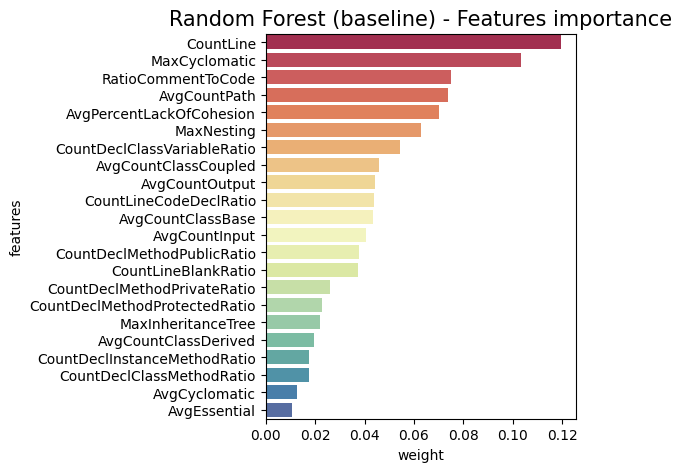

In [31]:
plot_feature_importances(model_baseline, "Random Forest (baseline)", features=features)

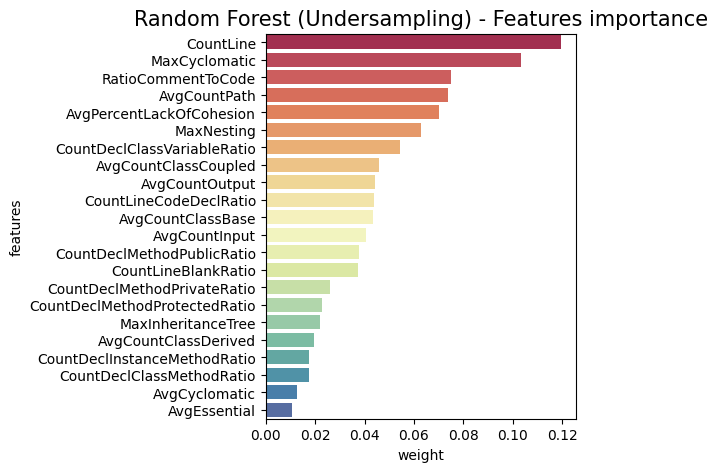

In [32]:
plot_feature_importances(model_tuned._final_estimator, "Random Forest (Undersampling)", features=features)

# Nomogram